### Principal Component Analysis[27/03/24]

### 1. Consider the two dimensional data matrix [(2, 1), (3, 4), (5, 0), (7, 6), (9, 2)]. Implement principal component analysis. Use this to obtain the feature in transformed 2D feature space. Plot the scatter plot of data points in both the original as well as transformed domain.

### Note: Develop the code without using library function ‘PCA’. Import linalg module from numpy to compute the eigen values and corresponding eigen vectors.

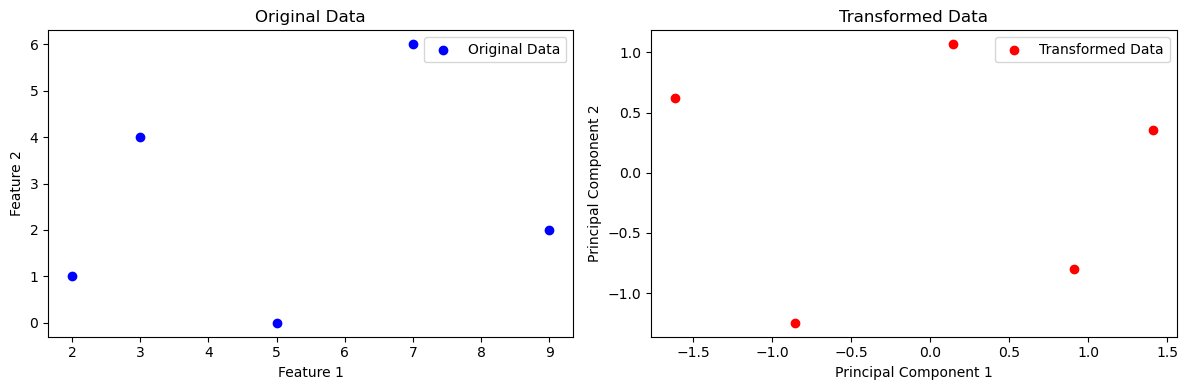

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Original data
data = np.array([[2, 1], [3, 4], [5, 0], [7, 6], [9, 2]])

# Step 1: Standardize the data
mean = np.mean(data, axis=0)
std_dev = np.std(data, axis=0)
data_std = (data - mean) / std_dev

# Step 2: Compute the covariance matrix
cov_matrix = np.cov(data_std.T)

# Step 3: Obtain the eigenvectors and eigenvalues of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Choose the principal components
# Sort eigenvalues in decreasing order
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Step 5: Transform the data into the new feature space
transformed_data = np.dot(data_std, eigenvectors)

# Scatter plot of original data
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c='b', label='Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Data')
plt.legend()

# Scatter plot of transformed data
plt.subplot(1, 2, 2)
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c='r', label='Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Transformed Data')
plt.legend()

plt.tight_layout()
plt.show()


### 2. Implement Principal Component Analysis Algorithm and use it to reduce dimensions  of Iris Dataset (from 4D to 2D). Plot the scatter plot for samples in the transformed domain with different colour codes for samples belonging to different classes.

### Note: Develop the code without using library function ‘PCA’. Import linalg module from numpy to compute the eigen values and corresponding eigen vectors.

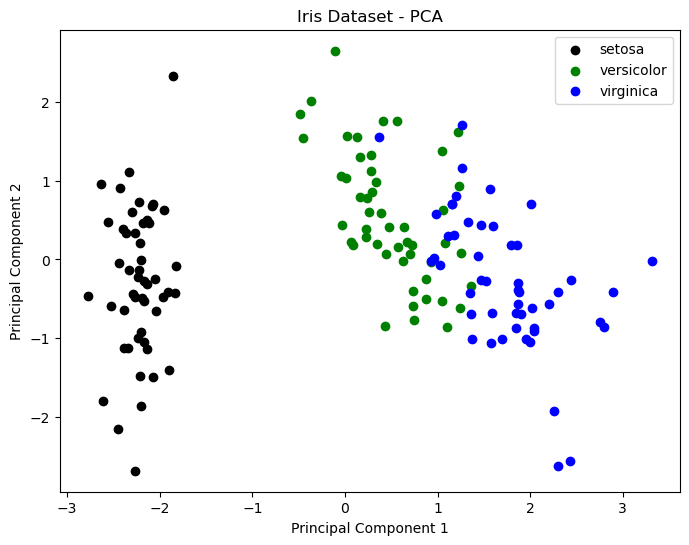

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
data = iris.data

# Step 1: Standardize the data
mean = np.mean(data, axis=0)
std_dev = np.std(data, axis=0)
data_std = (data - mean) / std_dev

# Step 2: Compute the covariance matrix
cov_matrix = np.cov(data_std.T)

# Step 3: Obtain the eigenvectors and eigenvalues of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Choose the principal components
# Sort eigenvalues in decreasing order
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Choose the top k eigenvectors (here, k=2 for 2D projection)
k = 2
selected_eigenvectors = eigenvectors[:, :k]

# Step 5: Transform the data into the new feature space
transformed_data = np.dot(data_std, selected_eigenvectors)

# Scatter plot of transformed data with different color codes for different classes
plt.figure(figsize=(8, 6))
colors = ['black', 'g', 'b']
for i, color in enumerate(colors):
    plt.scatter(transformed_data[iris.target == i, 0], transformed_data[iris.target == i, 1], color=color, label=iris.target_names[i])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Iris Dataset - PCA')
plt.legend()
plt.show()
